# Description

It takes a GWAS that was imputed and postprocessed (using the PrediXcan scripts here https://github.com/hakyimlab/summary-gwas-imputation) and verifies that the Manhattan and QQ-plots look fine (without inflation).

# Modules

In [1]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





# Settings

In [3]:
PROJECTS_TRAIT_KEY <- "CHRONOTYPE"

In [4]:
# Parameters
PHENOPLIER_NOTEBOOK_FILEPATH <- "projects/chronotype/nbs/10_gwas_harmonization/15-gwas-qqplot.ipynb"

# Paths

In [5]:
DATA_DIR <- Sys.getenv(paste0("PHENOPLIER_PROJECTS_", PROJECTS_TRAIT_KEY, "_RESULTS_DIR"))

In [6]:
DATA_DIR

[1] "/opt/data/projects/chronotype/results"

In [7]:
INPUT_GWAS_DIR <- file.path(DATA_DIR, "final_imputed_gwas")

In [8]:
INPUT_GWAS_DIR

[1] "/opt/data/projects/chronotype/results/final_imputed_gwas"

# Load trait info file

In [9]:
trait_info <- read_csv(Sys.getenv(paste0("PHENOPLIER_PROJECTS_", PROJECTS_TRAIT_KEY, "_TRAITS_INFO_FILE")), col_names = TRUE)

Rows: 1 Columns: 4
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): id, gwas_file
dbl (1): sample_size
lgl (1): n_cases

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
trait_info

id,gwas_file,sample_size,n_cases
<chr>,<chr>,<dbl>,<lgl>
chronotype,chronotype_raw_BOLT.output_HRC.only_plus.metrics_maf0.001_hwep1em12_info0.3.txt.gz,449734,NA


# Chronotype

In [11]:
gwas_title <- "Chronotype (imputed)"

## Get GWAS file

In [12]:
row <- which(trait_info$id == "chronotype")
gwas_filename <- trait_info[[row, "gwas_file"]]

In [13]:
gwas_filename

[1] "chronotype_raw_BOLT.output_HRC.only_plus.metrics_maf0.001_hwep1em12_info0.3.txt.gz"

In [14]:
gwas_filename <- tools::file_path_sans_ext(gwas_filename)

## Load data

In [15]:
gwas <- as.data.frame(read_table(file.path(INPUT_GWAS_DIR, paste0(gwas_filename, "-harmonized-imputed.txt.gz"))))


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  variant_id = col_character(),
  panel_variant_id = col_character(),
  chromosome = col_character(),
  position = col_double(),
  effect_allele = col_character(),
  non_effect_allele = col_character(),
  current_build = col_character(),
  frequency = col_double(),
  sample_size = col_double(),
  zscore = col_double(),
  pvalue = col_double(),
  effect_size = col_double(),
  standard_error = col_double(),
  imputation_status = col_character(),
  n_cases = col_logical()
)



In [16]:
dim(gwas)

[1] 11742680       15

In [17]:
head(gwas)

,variant_id,panel_variant_id,chromosome,position,effect_allele,non_effect_allele,current_build,frequency,sample_size,zscore,pvalue,effect_size,standard_error,imputation_status,n_cases
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,rs141149254,chr1_54490_G_A_b38,chr1,54490,A,G,hg38,0.177669903,449734,-2.45358331,0.01414408,NA,NA,imputed,NA
2,rs188486692,chr1_87021_T_C_b38,chr1,87021,C,T,hg38,0.011650485,449734,-1.64239865,0.10050741,NA,NA,imputed,NA
3,rs112455420,chr1_263722_C_G_b38,chr1,263722,G,C,hg38,0.122330097,449734,0.60854533,0.54282585,NA,NA,imputed,NA
4,rs144425991,chr1_594402_C_T_b38,chr1,594402,T,C,hg38,0.026213592,449734,0.30990748,0.75663131,NA,NA,imputed,NA
5,rs554127336,chr1_630089_C_T_b38,chr1,630089,T,C,hg38,0.005825243,449734,0.29237490,0.77000000,0.0247282,0.0618666,original,NA
6,rs55973403,chr1_630555_C_T_b38,chr1,630555,T,C,hg38,0.021359223,449734,-0.06186437,0.95067084,NA,NA,imputed,NA


### Extract chromosome

In [18]:
unique(gwas$chromosome)

[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22"

In [19]:
gwas$chrom <- gsub("chr([0-9]+)", "\\1", gwas$chromosome)
gwas <- transform(gwas, chrom = as.numeric(chrom))

In [20]:
unique(gwas$chrom)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

## Stats

In [21]:
summary(gwas)

  variant_id        panel_variant_id    chromosome           position        
 Length:11742680    Length:11742680    Length:11742680    Min.   :    10596  
 Class :character   Class :character   Class :character   1st Qu.: 32637320  
 Mode  :character   Mode  :character   Mode  :character   Median : 69329054  
                                                          Mean   : 78649708  
                                                          3rd Qu.:113951300  
                                                          Max.   :248930878  
                                                                             
 effect_allele      non_effect_allele  current_build        frequency       
 Length:11742680    Length:11742680    Length:11742680    Min.   :0.000000  
 Class :character   Class :character   Class :character   1st Qu.:0.007767  
 Mode  :character   Mode  :character   Mode  :character   Median :0.054369  
                                                          Mean   :0.

## Remove NA pvalues

In [22]:
dim(gwas)

[1] 11742680       16

In [23]:
gwas <- gwas %>% filter(pvalue >= 0 & pvalue <= 1)

In [24]:
dim(gwas)

[1] 11737794       16

## Manhattan plot

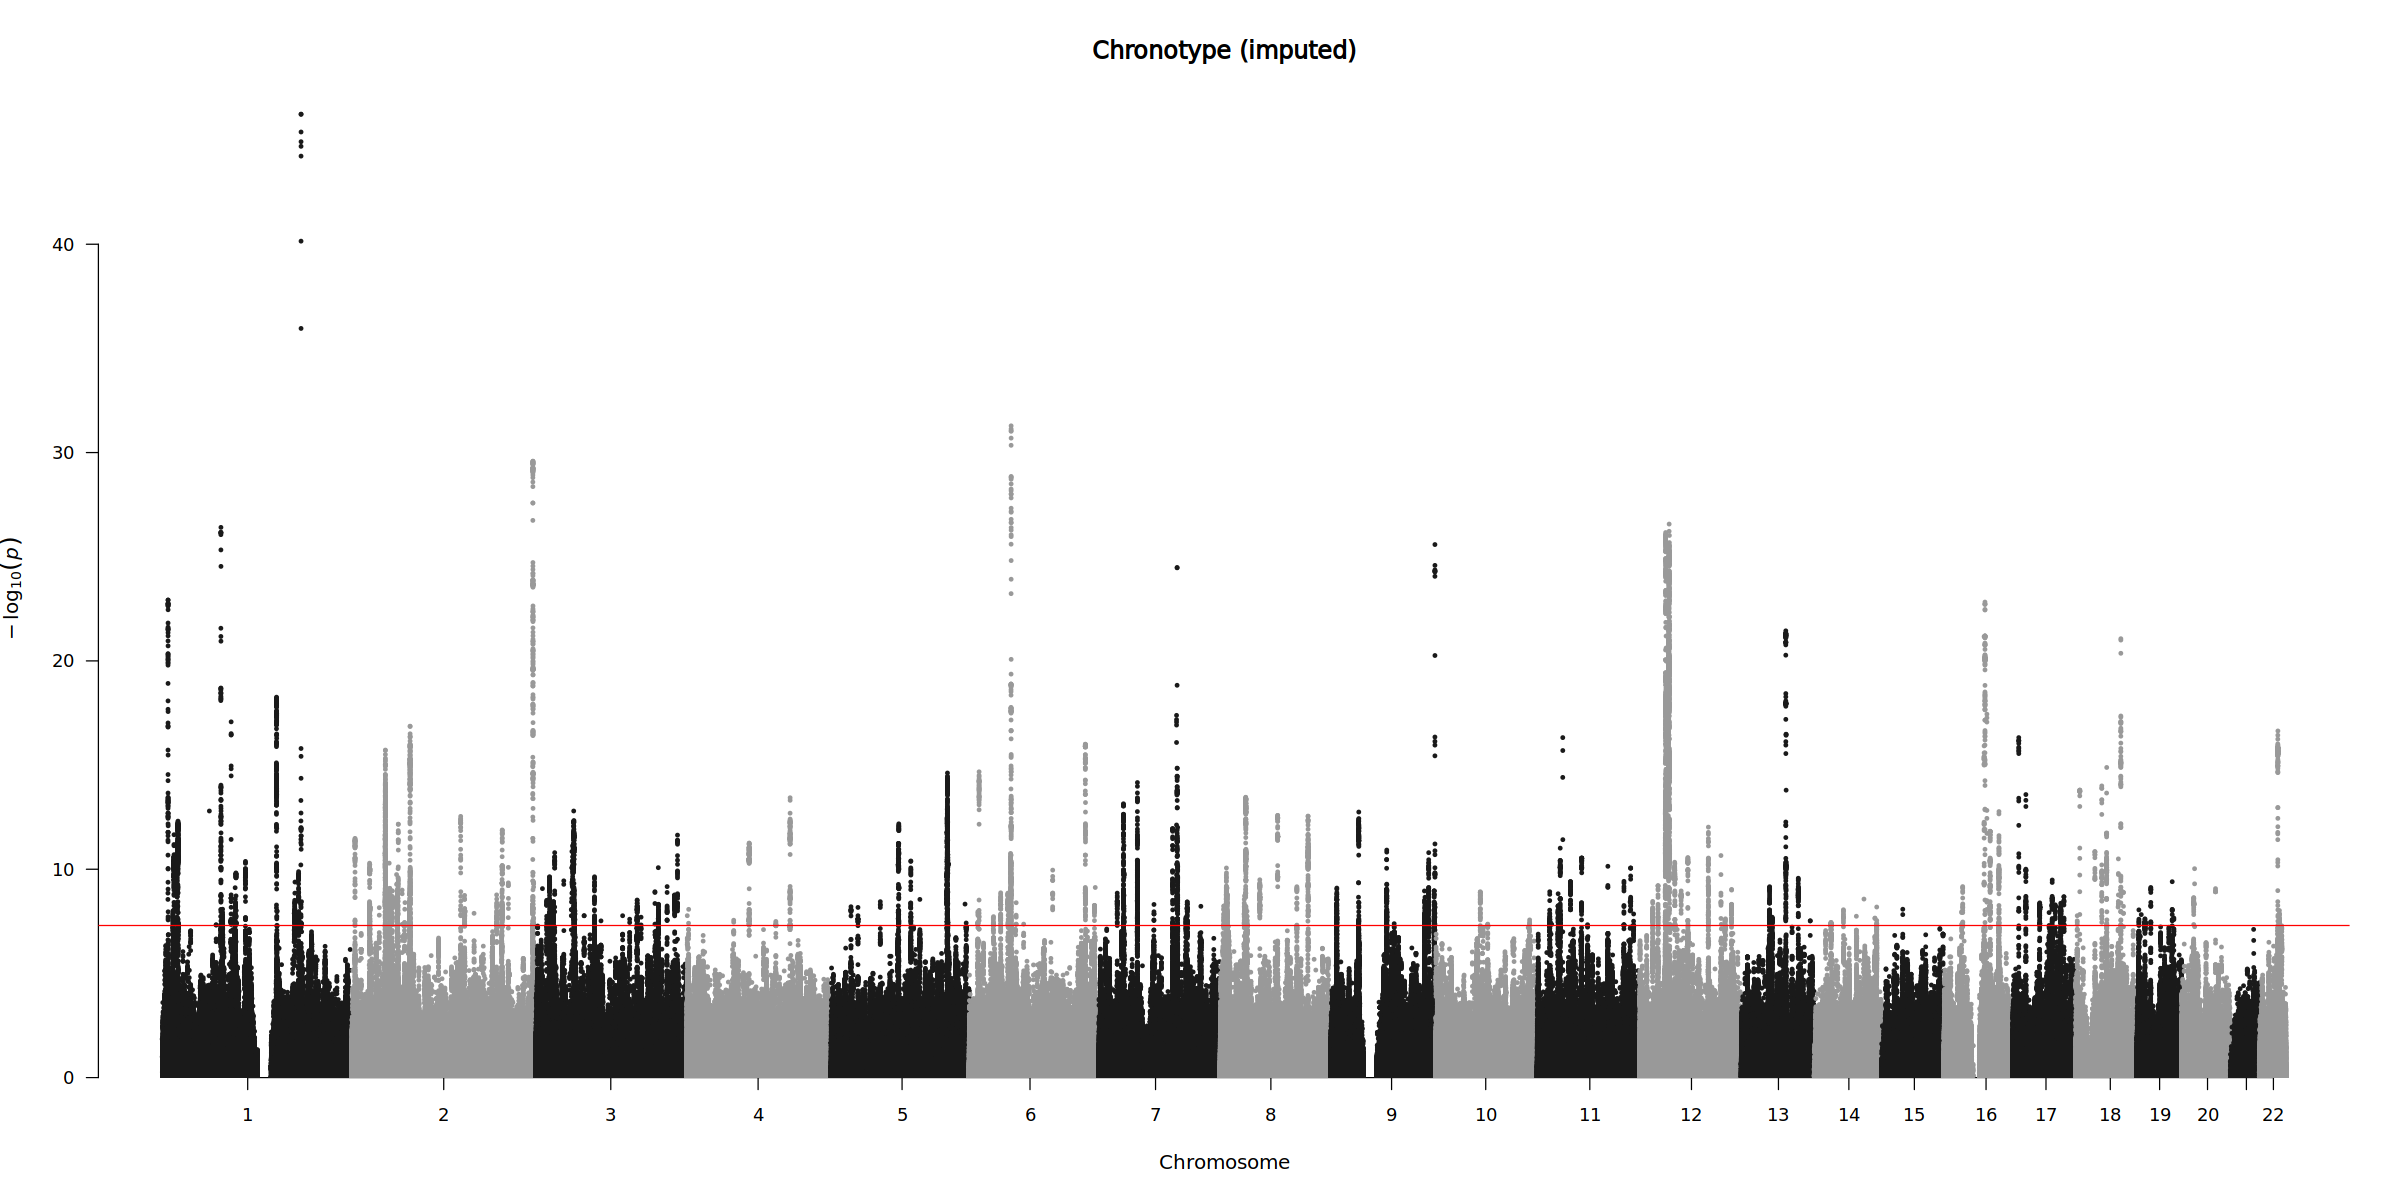

In [25]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "chrom",
  bp = "position",
  p = "pvalue",
  snp = "variant_id",
  main = gwas_title,
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
)

## QQ-plot

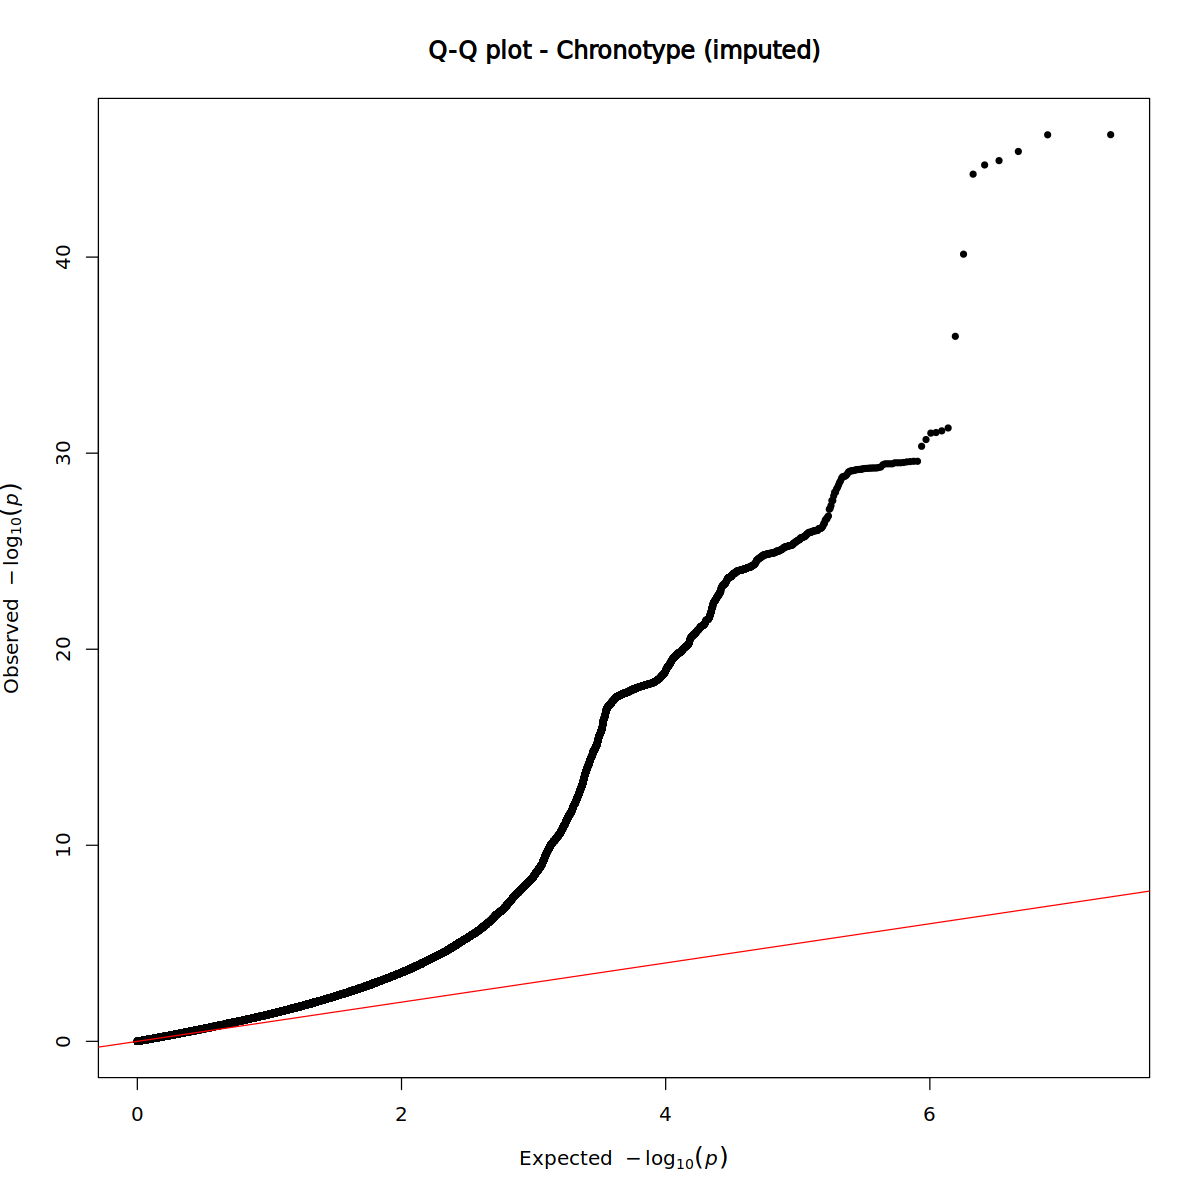

In [26]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(
  gwas$pvalue,
  main = paste0("Q-Q plot - ", gwas_title)
)